<h1>A visit to Shimla City(Hill Queen) of India!@@</h1>
<h2>Index</h2>
<h3>1.Introduction</h3>
<h3>2.Data Collection from APIs</h3>
<h3>3.Data Cleaning Procedure followed</h3>
<h3>4.Methodolgy Adopted</h3>
<h3>5.Analysis</h3>
<h3>6.Results and Discussion</h3>
<h3>7.Final Conclusion</h3>

<center><h1>Introduction</h1> </center>
<h2>Aim of the Project work</h2>
The aim of the project is to identify venues in Shimla city which is also called the Hill Queen of India,based on their rating and average prices. In this notebook, we will identify various venues in the city of Shimla, using a Foursquare API and a Zomato API.
This shall help visitors select the restaurants that suit them the best.

Whenever a user is visiting a city they start looking for places to visit during their stay. They primarily look for places based on the venue ratings across all venues and the average prices such that the locations fits in their budget.

Here, we'll identify places that are fit for various individuals based on the information collected from the two APIs and Data Science. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.

<h2>Data Collection from APIs</h2>

To begin with, we will take a look at Shimla on the Map using the folium library.Shimla is the capital of the northern Indian state of Himachal Pradesh, in the Himalayan foothills. Once the summer capital of British India, it remains the terminus of the narrow-gauge Kalka-Shimla Railway, completed in 1903. It’s also known for the handicraft shops that line The Mall, a pedestrian avenue, as well as the Lakkar Bazaar, a market specializing in wooden toys and crafts.

<h2>Elevation: 2,276 m</h2>
<h2>Area: 35.34 km²</h2>
<h2>Weather: 11 °C, Wind NE at 8 km/h, 97% Humidity</h2>
<h2>Population: 1.7 lakhs (2011)</h2>
<h2>Local time: Sunday, 6:46 pm</h2>
<h2>Metro population: 1,71,640</h2>
<center><h4>Now We will also fetch the data from two different APIs.</h4></center>
<h2>(1)Foursquare API:</h2> We will use the Foursquare API to fetch venues in Shimla starting from the middle upto 44 Kilometers in each direction.
<h2>(2)Zomato API:</h2> The Zomato API provides information about various venues including the complete address, user ratings, price for two people, price range and a lot more.

In [3]:
!pip install geocoder
!pip install folium
Shimla_LATITUDE = 31.104605
Shimla_LONGITUDE = 77.173424
print('The geograpical coordinates of Shimla are {}, {}.'.format(Shimla_LATITUDE, Shimla_LONGITUDE))

The geograpical coordinates of Shimla are 31.104605, 77.173424.


Let's use the folium library to create a complete map zoomed on Shimla. We'll also plot a marker on the coordinates we just identified above. This would give us a relatively good look at the center point we will be considering.

In [4]:
import folium
Shimla_map = folium.Map(location = [Shimla_LATITUDE, Shimla_LONGITUDE], zoom_start = 13)
folium.Marker([Shimla_LATITUDE, Shimla_LONGITUDE]).add_to(Shimla_map)


In [5]:
Shimla_map.save("Shimla_Map.html")
Shimla_map

<h2>Foursquare API----></h2>
We begin by fetching a total of all venues in Shimla upto a range of 4 Kilometers using the Foursquare API. The Foursquare API has the explore API which allows us to find venue recommendations within a given radius from the given coordinates. We will use this API to find all the venues we need.

We'll call the API over and over till we get all venues from the API within the given distance. The maximum venues this API can fetch is 100, so we will fetch all venues by iteratively calling this API and increasing the offset each time.

Foursquare API requires client_id, and client_secret to function which can be accessed after creating a developer account.
We will set the radius as 4 Kilometers.
The version is a required parameter which defines the date on which we are browsing so that it retrieves the latest data.

In [6]:
FOURSQUARE_CLIENT_ID = '31R2ODOD0C4YPAYH0WEILGFNRD5HFU2OVPBE0RLSRCZXN4XK'
FOURSQUARE_CLIENT_SECRET = 'JUT1WF1U2HQAI15FN2V11CB40BMPQPRCDJ1NTZQM1AROFLC4'

In [8]:
RADIUS = 4000 # 4 Km
NO_OF_VENUES = 100
VERSION = '20200531'

We define the get_category_type method to get the correct category for each venue.

In [10]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

from pandas.io.json import json_normalize
import requests

pd.set_option('display.max_rows', None)

offset = 0
total_venues = 0
foursquare_venues = pd.DataFrame(columns = ['name', 'categories', 'lat', 'lng'])

while (True):
    url = ('https://api.foursquare.com/v2/venues/explore?client_id={}'
           '&client_secret={}&v={}&ll={},{}&radius={}&limit={}&offset={}').format(FOURSQUARE_CLIENT_ID, 
                                                                        FOURSQUARE_CLIENT_SECRET, 
                                                                        VERSION, 
                                                                        Shimla_LATITUDE, 
                                                                        Shimla_LONGITUDE, 
                                                                        RADIUS,
                                                                        NO_OF_VENUES,
                                                                        offset)
    result = requests.get(url).json()
    venues_fetched = len(result['response']['groups'][0]['items'])
    total_venues = total_venues + venues_fetched
    print("Total {} venues fetched within a total radius of {} Km".format(venues_fetched, RADIUS/1000))

    venues = result['response']['groups'][0]['items']
    venues = json_normalize(venues)

    # Filter the columns
    filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
    venues = venues.loc[:, filtered_columns]

    # Filter the category for each row
    venues['venue.categories'] = venues.apply(get_category_type, axis = 1)

    # Clean all column names
    venues.columns = [col.split(".")[-1] for col in venues.columns]
    foursquare_venues = pd.concat([foursquare_venues, venues], axis = 0, sort = False)
    
    if (venues_fetched < 100):
        break
    else:
        offset = offset + 100

foursquare_venues = foursquare_venues.reset_index(drop = True)
print("\nTotal {} venues fetched".format(total_venues))

Total 20 venues fetched within a total radius of 4.0 Km

Total 20 venues fetched


<h2>Zomato API</h2>
The Zomato API allows using its search API to search for any given venue based on certain search filters such as query, latitude, longitude and more. Zomato also requires a Zomato user key which can be accessed with a developer account.

We'll use the name, lat, and lng values of various venues fetched from Foursquare API to use the search API and get more information regarding each venue.

1.The query will be the name of the venue.<br>
2.The start defines from what offset we want to start, so we'll keep it at 0.<br>
3.The count defines the number of restaurants we want to fetch. As we have the exact location coordinates, we'll fetch only one.<br>
4.We will supply the latitude and longitude values.<br>
5.We will set the sorting criteria as real_distance so each time we get the venue we're searching based on location coordinates.<br>

In [20]:
headers = {'user-key': '5ab4016176c98d43796dcae86c67b140'}

In [21]:
venues_information = []

for index, row in foursquare_venues.iterrows():
    print("Fetching data for venue: {}".format(index + 1))
    venue = []
    url = ('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&count=1&lat={}&lon={}&sort=real_distance').format(row['name'], row['lat'], row['lng'])
    result = requests.get(url, headers = headers).json()
    if (len(result['restaurants']) > 0):
        venue.append(result['restaurants'][0]['restaurant']['name'])
        venue.append(result['restaurants'][0]['restaurant']['location']['latitude'])
        venue.append(result['restaurants'][0]['restaurant']['location']['longitude'])
        venue.append(result['restaurants'][0]['restaurant']['average_cost_for_two'])
        venue.append(result['restaurants'][0]['restaurant']['price_range'])
        venue.append(result['restaurants'][0]['restaurant']['user_rating']['aggregate_rating'])
        venue.append(result['restaurants'][0]['restaurant']['location']['address'])
        venues_information.append(venue)
    else:
        venues_information.append(np.zeros(6))
    
zomato_venues = pd.DataFrame(venues_information, 
                                  columns = ['venue', 'latitude', 
                                             'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address'])


Fetching data for venue: 1
Fetching data for venue: 2
Fetching data for venue: 3
Fetching data for venue: 4
Fetching data for venue: 5
Fetching data for venue: 6
Fetching data for venue: 7
Fetching data for venue: 8
Fetching data for venue: 9
Fetching data for venue: 10
Fetching data for venue: 11
Fetching data for venue: 12
Fetching data for venue: 13
Fetching data for venue: 14
Fetching data for venue: 15
Fetching data for venue: 16
Fetching data for venue: 17
Fetching data for venue: 18
Fetching data for venue: 19
Fetching data for venue: 20


<h2>Data Cleaning</h2> 
The data from multiple resources might not always align. Thus, it is important to combine the data retrieved from multiple resources properly.

We'll first plot the two data points on the map. We'll then try to combine data points that have their latitude and longitude values very close to one another. From the remaining selected venues, we will inspect the venues to ensure that any remaining mismatched venues are also removed from the final dataset of venues before we begin any analysis.

We will first plot the Foursquare data on the map.

In [22]:
#Data Cleaning
Shimla_map = folium.Map(location = [Shimla_LATITUDE, Shimla_LONGITUDE], zoom_start = 13)

for name, latitude, longitude in zip(foursquare_venues['name'], foursquare_venues['lat'], foursquare_venues['lng']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'green',
        fill = True,
        fill_color = '#3186cc',
        fill_opacity = 0.7,
        parse_html = False).add_to(Shimla_map)  

Shimla_map.save("Forsquare_Map.html")
Shimla_map

From the map, we can infer that there are clusters of venues around:-<h3> Shimla main,Tutikandi, Longwood, Chaura Maidan,Mall Road,Cart Road areas</h3> 

We will also plot the Zomato data on the map.

In [2]:
Shimla_map = folium.Map(location = [Shimla_LATITUDE, Shimla_LONGITUDE], zoom_start = 13)

for venue, address, latitude, longitude in zip(zomato_venues['venue'], zomato_venues['address'], 
                                               zomato_venues['latitude'], zomato_venues['longitude']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = 'red',
        fill = True,
        fill_color = '#cc3535',
        fill_opacity = 0.7,
        parse_html = False).add_to(Shimla_map)  

Shimla_map.save("Zomato_Map.html")
Shimla_map

NameError: name 'folium' is not defined

To combine the two datasets, I'll have to check that the latitude and longitude values of each corresponding venue match. Thus, I'll round both the latitude and longitude values upto 4 decimal places. Then, I'll calculate the difference between the corresponding latitude and longitude values and see if the difference is less than 0.0004 which should ideally mean that the two locations are same.

In [24]:
#Combining the two datasets from Foursquare & Zomato to remove the duplicate data
foursquare_venues['lat'] = foursquare_venues['lat'].apply(lambda lat: round(float(lat), 4))
foursquare_venues['lng'] = foursquare_venues['lng'].apply(lambda lng: round(float(lng), 4))
zomato_venues['latitude'] = zomato_venues['latitude'].apply(lambda lat: round(float(lat), 4))
zomato_venues['longitude'] = zomato_venues['longitude'].apply(lambda lng: round(float(lng), 4))

In [25]:
dataset = pd.concat([foursquare_venues, zomato_venues], axis = 1)
dataset['lat_diff'] = dataset['latitude'] - dataset['lat']
dataset['lng_diff'] = dataset['longitude'] - dataset['lng']

In [26]:
selected_venues = dataset[(abs(dataset['lat_diff']) <= 0.0004) & (abs(dataset['lng_diff']) <= 0.0004)].reset_index(drop = True)
selected_venues

,name,categories,lat,lng,venue,latitude,longitude,price_for_two,price_range,rating,address,lat_diff,lng_diff
0,Shimla,City,31.1053,77.1717,Dobby's,31.1052,77.1716,350,2,0,"Mall Road, Near Syndicate Bank, Summer Hill, S...",-0.0001,-0.0001
1,The Mall,Plaza,31.1046,77.1751,Honey Hut,31.1044,77.1750,450,2,4.2,"Khadi Bhawan, Middle Bazaar, Mall Road, Summer...",-0.0002,-0.0001
2,Lakkar Bazaar,Furniture / Home Store,31.1065,77.1784,Fresh Juice Shop,31.1063,77.1782,150,1,0,"Lakkar Bazar, Longwood, Shimla",-0.0002,-0.0002
3,"The Ridge, Shimla",Monument / Landmark,31.1048,77.1758,Book Cafe,31.1050,77.1760,200,1,0,"Takka Bench, Ridge, The Mall, Summer Hill, Shimla",0.0002,0.0002
4,Wake and Bake Cafe,Café,31.1047,77.1732,Wake & Bake,31.1047,77.1732,800,3,3.9,"34/2, The Mall Shimla, Teh. & Amp Distt, Shiml...",0.0000,0.0000
5,Indian coffee house,Coffee Shop,31.1054,77.1710,Indian Coffee House,31.1054,77.1713,350,2,3.8,"1, The, Mall Rd, Lower Bazar, Shimla, Himachal...",0.0000,0.0003
6,The Oberoi Cecil,Hotel,31.1032,77.1549,The Restaurant - The Oberoi Cecil,31.1032,77.1550,2200,4,3.9,"The Oberoi Cecil, Nabha, State Museum Road, Lo...",0.0000,0.0001
7,Baljees Fascination,Indian Restaurant,31.1047,77.1728,Baljees Sweet Shop,31.1048,77.1729,300,1,4.1,"Near Scandal Point, Summer Hill, Shimla",0.0001,0.0001
8,Sher-e-Punjab,Indian Restaurant,31.1033,77.1768,Sher-e-Punjab,31.1033,77.1770,600,2,2.8,"Mall Road, Summer Hill, Shimla",0.0000,0.0002
9,Domino's Pizza,Pizza Place,31.1049,77.1729,Domino's Pizza,31.1049,77.1728,400,2,3.4,"24, Mall Road, Summer Hill, Shimla",0.0000,-0.0001


Taking a look at the names of venues from both APIs, some names are a complete mismatch.

Category 1: There are venues that have specific restaurants/cafes inside them as provided by Zomato API .

Category 2: Two locations are so close by that they have practically same latitude and longitude values .

Category 3: Some have been replaced with new restaurants 

The venues which belong to category 1 and category 3 are alright to keep, the venues that fall in category 2 should be removed.

In [27]:
selected_venues = selected_venues.drop([2]).reset_index(drop = True)

In [28]:
selected_venues['average_price'] = selected_venues['price_for_two']/2
selected_venues = selected_venues.drop(columns = ['name', 'lat', 'lng', 'lat_diff', 'lng_diff', 'price_for_two'])

In [29]:
selected_venues

,categories,venue,latitude,longitude,price_range,rating,address,average_price
0,City,Dobby's,31.1052,77.1716,2,0,"Mall Road, Near Syndicate Bank, Summer Hill, S...",175.0
1,Plaza,Honey Hut,31.1044,77.1750,2,4.2,"Khadi Bhawan, Middle Bazaar, Mall Road, Summer...",225.0
2,Monument / Landmark,Book Cafe,31.1050,77.1760,1,0,"Takka Bench, Ridge, The Mall, Summer Hill, Shimla",100.0
3,Café,Wake & Bake,31.1047,77.1732,3,3.9,"34/2, The Mall Shimla, Teh. & Amp Distt, Shiml...",400.0
4,Coffee Shop,Indian Coffee House,31.1054,77.1713,2,3.8,"1, The, Mall Rd, Lower Bazar, Shimla, Himachal...",175.0
5,Hotel,The Restaurant - The Oberoi Cecil,31.1032,77.1550,4,3.9,"The Oberoi Cecil, Nabha, State Museum Road, Lo...",1100.0
6,Indian Restaurant,Baljees Sweet Shop,31.1048,77.1729,1,4.1,"Near Scandal Point, Summer Hill, Shimla",150.0
7,Indian Restaurant,Sher-e-Punjab,31.1033,77.1770,2,2.8,"Mall Road, Summer Hill, Shimla",300.0
8,Pizza Place,Domino's Pizza,31.1049,77.1728,2,3.4,"24, Mall Road, Summer Hill, Shimla",200.0
9,Coffee Shop,Cafe Coffee Day,31.1044,77.1747,2,2.8,"Middle Bazaar, Mall Road, Summer Hill, Shimla",250.0


In [30]:
selected_venues = selected_venues[selected_venues['rating'] != 0.0]
print("Total venues available: {}".format(selected_venues.shape[0]))

Total venues available: 10


<BarContainer object of 6 artists>

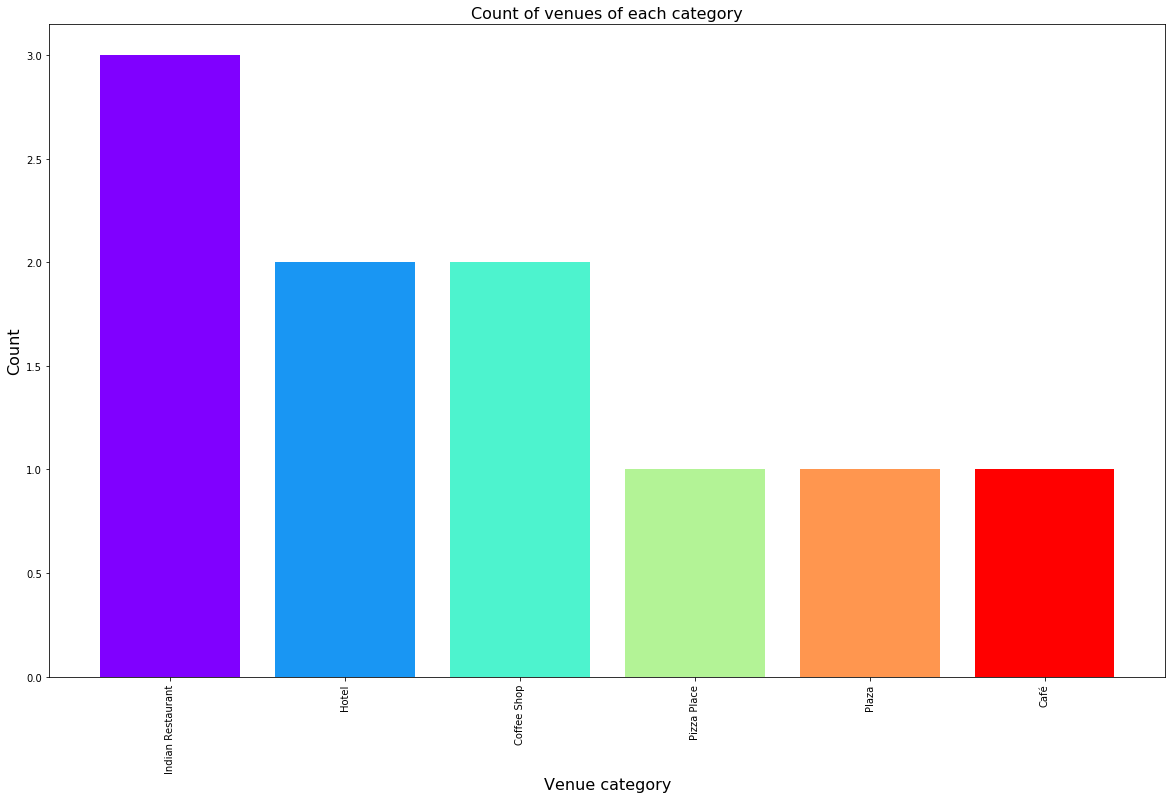

In [31]:
#Analysis: Categories
venue_distribution = selected_venues['categories'].value_counts()
colors = cm.rainbow(np.linspace(0, 1, len(venue_distribution.index)))
plt.figure(figsize = (20, 12))
plt.xticks(rotation = 90)
plt.xlabel("Venue category", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues of each category", fontsize = 16)
plt.bar(venue_distribution.index, venue_distribution.values, color = colors)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'Count of venues with given rating')

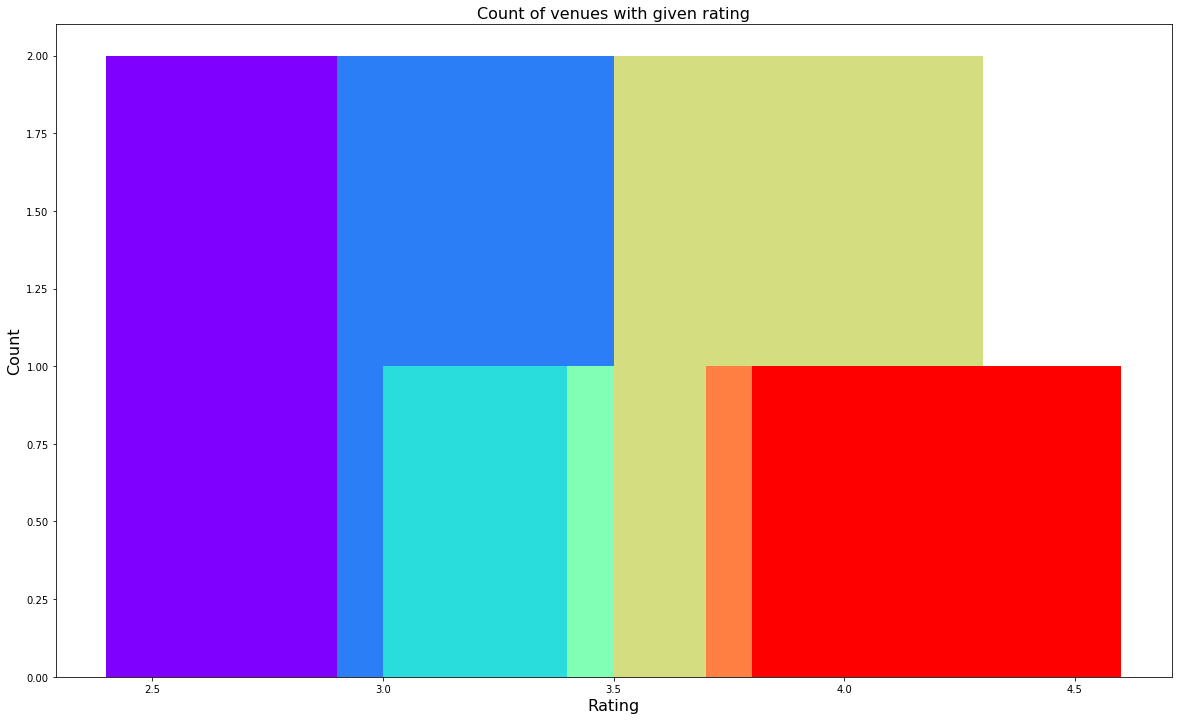

In [32]:
#Ratings
selected_venues['rating'] = selected_venues['rating'].astype(float)
rating = selected_venues['rating'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.bar(rating.index, rating.values, color = cm.rainbow(np.linspace(0, 1, len(rating.index))))
plt.xlabel("Rating", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("Count of venues with given rating", fontsize = 16)

In [33]:
bins = [1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['Low', 'Okay', 'Good', 'Very good']
selected_venues['rating_bin'] = pd.cut(selected_venues['rating'].astype(float), bins = bins, labels = labels, include_lowest = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [34]:
color_map = {'Low': 'red', 'Okay': 'orange', 'Good': 'green', 'Very good': 'darkgreen'}

Shimla_map = folium.Map(location = [Shimla_LATITUDE, Shimla_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, rating_bin in zip(selected_venues['venue'], 
                                                          selected_venues['address'], 
                                                          selected_venues['latitude'], 
                                                          selected_venues['longitude'], 
                                                          selected_venues['rating_bin']):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[rating_bin]),
        popup = label).add_to(Shimla_map)  

Shimla_map.save("Venues Ratings.html")
Shimla_map

Text(0.5, 1.0, 'Count of venues with given average price')

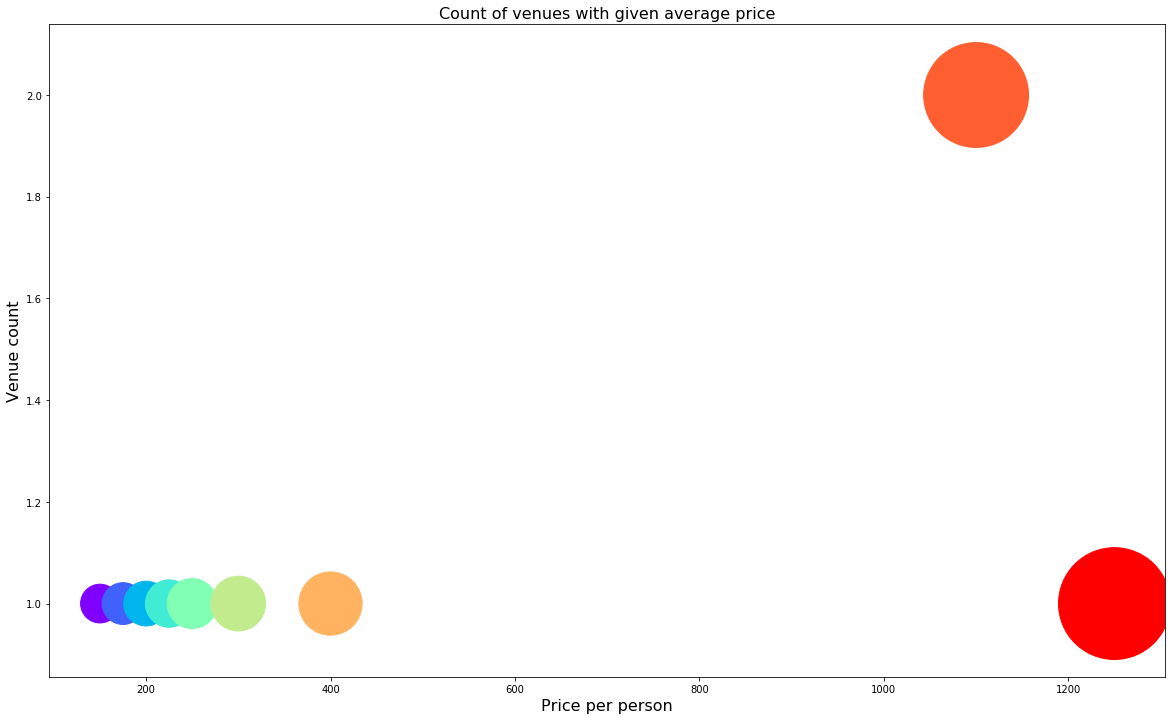

In [35]:
#segmentation on the basis of Price 
average_prices = selected_venues['average_price'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 16)
plt.ylabel("Venue count", fontsize = 16)
plt.title("Count of venues with given average price", fontsize = 16)

In [3]:
color_map = {'1.0': 'green', '2.0': 'blue', '3.0': 'orange', '4.0': 'red'}

Shimla_map = folium.Map(location = [Shimla_LATITUDE, Shimla_LONGITUDE], zoom_start = 13)

for name, address, latitude, longitude, price_range in zip(selected_venues['venue'], 
                                                           selected_venues['address'], 
                                                           selected_venues['latitude'], 
                                                           selected_venues['longitude'], 
                                                           selected_venues['price_range'].astype(str)):
    label = '{}, {}'.format(name, address)
    label = folium.Popup(label, parse_html = True)
    folium.Marker(
        [latitude, longitude],
        icon = folium.Icon(color = color_map[price_range]),
        popup = label).add_to(Shimla_map)  

Shimla_map.save("Venues Prices.html")
Shimla_map

NameError: name 'folium' is not defined

In [39]:
#Clustering
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 2

clustering = selected_venues.drop(['venue', 'address', 'rating_bin', 'categories'], 1)
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)
selected_venues.insert(0, 'cluster_labels', kMeans.labels_)
selected_venues.head(5)

,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
1,0,Plaza,Honey Hut,31.1044,77.1750,2,4.2,"Khadi Bhawan, Middle Bazaar, Mall Road, Summer...",225.0,Very good
3,0,Café,Wake & Bake,31.1047,77.1732,3,3.9,"34/2, The Mall Shimla, Teh. & Amp Distt, Shiml...",400.0,Good
4,0,Coffee Shop,Indian Coffee House,31.1054,77.1713,2,3.8,"1, The, Mall Rd, Lower Bazar, Shimla, Himachal...",175.0,Good
5,1,Hotel,The Restaurant - The Oberoi Cecil,31.1032,77.1550,4,3.9,"The Oberoi Cecil, Nabha, State Museum Road, Lo...",1100.0,Good
6,0,Indian Restaurant,Baljees Sweet Shop,31.1048,77.1729,1,4.1,"Near Scandal Point, Summer Hill, Shimla",150.0,Very good


In [40]:
Shimla_map = folium.Map(location = [Shimla_LATITUDE, Shimla_LONGITUDE], zoom_start = 13)
color_map = { 0: 'green', 1: 'red'}

# add venues to the map
markers_colors = []
for venue, address, cluster, latitude, longitude in zip(selected_venues['venue'], 
                                                        selected_venues['address'], 
                                                        selected_venues['cluster_labels'], 
                                                        selected_venues['latitude'], 
                                                        selected_venues['longitude']):
    label = folium.Popup(str(venue) + ', ' + str(address), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 5,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(Shimla_map)

# add cluster centers to the map
for index, cluster in enumerate(kMeans.cluster_centers_):
    latitude = cluster[0]
    longitude = cluster[1]
    label = folium.Popup("Cluster: " + str(index), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 10,
        popup = label,
        color = color_map[index],
        fill = True,
        fill_color = color_map[index],
        fill_opacity = 0.7).add_to(Shimla_map)

Shimla_map.save("Venues Clusters.html")
Shimla_map

In [41]:
result = selected_venues[selected_venues['cluster_labels'] == 0]
print("Cluster 0")
result.head(10).reset_index(drop = True)

Cluster 0


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,0,Plaza,Honey Hut,31.1044,77.1750,2,4.2,"Khadi Bhawan, Middle Bazaar, Mall Road, Summer...",225.0,Very good
1,0,Café,Wake & Bake,31.1047,77.1732,3,3.9,"34/2, The Mall Shimla, Teh. & Amp Distt, Shiml...",400.0,Good
2,0,Coffee Shop,Indian Coffee House,31.1054,77.1713,2,3.8,"1, The, Mall Rd, Lower Bazar, Shimla, Himachal...",175.0,Good
3,0,Indian Restaurant,Baljees Sweet Shop,31.1048,77.1729,1,4.1,"Near Scandal Point, Summer Hill, Shimla",150.0,Very good
4,0,Indian Restaurant,Sher-e-Punjab,31.1033,77.1770,2,2.8,"Mall Road, Summer Hill, Shimla",300.0,Okay
5,0,Pizza Place,Domino's Pizza,31.1049,77.1728,2,3.4,"24, Mall Road, Summer Hill, Shimla",200.0,Good
6,0,Coffee Shop,Cafe Coffee Day,31.1044,77.1747,2,2.8,"Middle Bazaar, Mall Road, Summer Hill, Shimla",250.0,Okay


In [42]:
print("These venues for cluster 0 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 0 have mean price range of 2.00 and rating spread around 3.57


In [43]:
result = selected_venues[selected_venues['cluster_labels'] == 1]
print("Cluster 1")
result.head(10).reset_index(drop = True)

Cluster 1


,cluster_labels,categories,venue,latitude,longitude,price_range,rating,address,average_price,rating_bin
0,1,Hotel,The Restaurant - The Oberoi Cecil,31.1032,77.1550,4,3.9,"The Oberoi Cecil, Nabha, State Museum Road, Lo...",1100.0,Good
1,1,Hotel,Seventh Heaven,31.1021,77.1773,4,3.3,"Hotel Combermere, Mall Road, Summer Hill, Shimla",1250.0,Good
2,1,Indian Restaurant,HPTDC Goofa Ashiana Bar and Restaurant,31.1047,77.1742,4,3.3,"Ridge, The Mall, Longwood",1100.0,Good


In [44]:
print("These venues for cluster 1 have mean price range of {:.02f} and rating spread around {:.02f}".
      format(result['price_range'].mean(), result['rating'].astype(float).mean()))

These venues for cluster 1 have mean price range of 4.00 and rating spread around 3.50
